In [1]:
#Loading required packages and libraries

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Data preparation : Creating a datapath to locate data and read csv data format

DATA_PATH = os.path.join("../data/")
def load_homes_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "homesadj.csv")
    return pd.read_csv(csv_path)


In [3]:
# Stores data path and the file into homes object

homes = load_homes_data()
homes.head()


,folio,site_address,SiteCity,site_zip,sale_date,sale_price,bed,bath,year_built,sq_ft,total_sq_ft,neighborhood,total_stories,qualified,acreage
0,880790710,15941 FISHHAWK VIEW DR,LITHIA,33547,8/5/2016,117000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
1,880790706,15945 FISHHAWK VIEW DR,LITHIA,33547,4/28/2016,118000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
2,880790756,15944 FISHHAWK VIEW DR,LITHIA,33547,8/5/2016,121000,2.0,2.5,2011,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
3,741248296,6214 OSPREY LAKE CIR,RIVERVIEW,33578,2/22/2018,123000,3.0,2.5,2003,1506.0,1640.0,N Riverview Area NE of 301 & Alafia Rvr,2.0,Qualified,0.02
4,880790734,15977 FISHHAWK VIEW DR,LITHIA,33547,8/11/2016,125000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02


In [4]:
homes

,folio,site_address,SiteCity,site_zip,sale_date,sale_price,bed,bath,year_built,sq_ft,total_sq_ft,neighborhood,total_stories,qualified,acreage
0,880790710,15941 FISHHAWK VIEW DR,LITHIA,33547,8/5/2016,117000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
1,880790706,15945 FISHHAWK VIEW DR,LITHIA,33547,4/28/2016,118000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
2,880790756,15944 FISHHAWK VIEW DR,LITHIA,33547,8/5/2016,121000,2.0,2.5,2011,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
3,741248296,6214 OSPREY LAKE CIR,RIVERVIEW,33578,2/22/2018,123000,3.0,2.5,2003,1506.0,1640.0,N Riverview Area NE of 301 & Alafia Rvr,2.0,Qualified,0.02
4,880790734,15977 FISHHAWK VIEW DR,LITHIA,33547,8/11/2016,125000,2.0,2.5,2012,1216.0,1280.0,Fishhawk West Area,2.0,Qualified,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7875,880800818,5010 SANDERLING RIDGE DR,LITHIA,33547,6/22/2018,260000,4.0,2.0,2010,1854.0,2487.0,Fishhawk West Area,1.0,Qualified,0.15
7876,880800818,5010 SANDERLING RIDGE DR,LITHIA,33547,6/22/2018,260000,4.0,2.0,2010,1854.0,2487.0,Fishhawk West Area,1.0,Unqualified,0.15
7877,870981224,3331 STONEBRIDGE TRL,VALRICO,33596,5/20/2019,260000,4.0,2.5,1997,2016.0,2850.0,Riverhills Area,2.0,Qualified,0.15
7878,880921584,5717 HAWKLAKE RD,LITHIA,33547,4/9/2020,260000,4.0,2.0,2001,1751.0,2419.0,Fishhawk East Area,1.0,Qualified,0.15


In [63]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7880 entries, 0 to 7879
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   folio          7880 non-null   int64  
 1   site_address   7880 non-null   object 
 2   SiteCity       7879 non-null   object 
 3   site_zip       7880 non-null   object 
 4   sale_date      7880 non-null   object 
 5   sale_price     7880 non-null   int64  
 6   bed            7807 non-null   float64
 7   bath           7807 non-null   float64
 8   year_built     7880 non-null   int64  
 9   sq_ft          7814 non-null   float64
 10  total_sq_ft    7814 non-null   float64
 11  neighborhood   7880 non-null   object 
 12  total_stories  7815 non-null   float64
 13  qualified      7880 non-null   object 
 14  acreage        7880 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 923.6+ KB


In [64]:
homes.describe()

,folio,sale_price,bed,bath,year_built,sq_ft,total_sq_ft,total_stories,acreage
count,7.880000e+03,7.880000e+03,7807.000000,7807.000000,7880.000000,7814.000000,7814.000000,7815.000000,7880.000000
mean,8.417810e+08,3.052655e+05,3.790444,2.815358,2006.314721,2516.603660,3370.975557,1.481638,0.265816
std,6.548855e+07,1.632070e+05,0.811237,0.739223,7.763508,778.972088,1065.009191,0.502186,0.507291
min,4.793403e+08,1.000000e+02,1.000000,1.000000,1991.000000,752.000000,924.000000,0.000000,0.020000
25%,7.719248e+08,2.179000e+05,3.000000,2.000000,2000.000000,1956.000000,2611.000000,1.000000,0.140000
50%,8.806775e+08,3.030000e+05,4.000000,3.000000,2005.000000,2440.500000,3250.000000,1.000000,0.180000
75%,8.832961e+08,3.946500e+05,4.000000,3.000000,2015.000000,3002.000000,4015.000000,2.000000,0.262500
max,9.415802e+08,1.009000e+06,8.000000,7.000000,2019.000000,7129.000000,9141.000000,3.000000,18.680000


In [7]:
# Cleaning: Filling missing values in the dataset using medians of specific columns

df = homes
df['bed'] = df['bed'].fillna(df['bed'].median ())
df['bath'] = df['bath'].fillna(df['bath'].median())
df['sq_ft'] = df['sq_ft'].fillna(df['sq_ft'].median ())
df['total_sq_ft'] = df['total_sq_ft'].fillna(df['total_sq_ft'].median())
df ['total_stories'] = df['total_stories'].fillna(df['total_stories'].median())
df = df.apply(lambda x: x.fillna(x.value_counts(). index [0]))
df = df.loc[(df.sale_price > 100)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 0 to 7879
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   folio          7132 non-null   int64  
 1   site_address   7132 non-null   object 
 2   SiteCity       7132 non-null   object 
 3   site_zip       7132 non-null   object 
 4   sale_date      7132 non-null   object 
 5   sale_price     7132 non-null   int64  
 6   bed            7132 non-null   float64
 7   bath           7132 non-null   float64
 8   year_built     7132 non-null   int64  
 9   sq_ft          7132 non-null   float64
 10  total_sq_ft    7132 non-null   float64
 11  neighborhood   7132 non-null   object 
 12  total_stories  7132 non-null   float64
 13  qualified      7132 non-null   object 
 14  acreage        7132 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 891.5+ KB


In [8]:
# Import Linear regression package from Scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression(fit_intercept=True)

In [9]:
# Defining our predictor variable(X) and target variable (y)

X = df[['bed', 'bath', 'sq_ft', 'total_stories']]
y = df['sale_price']

In [17]:
# Split the data with 70% in training 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1840,
                                  train_size=0.7)

In [18]:
#Displays dimensions of the split data

print("TRAINING DATA")
print("The shape of the training predictors (X) is:", Xtrain.shape)
print("The shape of the training test (Y) is:", ytrain.shape)
print("TEST DATA")
print("The shape of the test predictors (X) is:", Xtest.shape)
print("The shape of the test (Y) is:", ytest.shape)

TRAINING DATA
The shape of the training predictors (X) is: (4992, 4)
The shape of the training test (Y) is: (4992,)
TEST DATA
The shape of the test predictors (X) is: (2140, 4)
The shape of the test (Y) is: (2140,)


In [19]:
model.fit(Xtrain, ytrain)
print(model.coef_)
print(model.intercept_)

[-19290.07708775  25664.50272407    155.16306165 -36995.60483526]
1605.2061782755773


In [20]:
# Validating the trained model on the test set of data

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


y_model = model.predict(Xtest)

In [21]:
y_model

array([209629.78259808, 614056.48421754, 491943.15470282, ...,
       356364.18147062, 331713.76807825, 200017.44607642])

InvalidIndexError: (slice(None, None, None), None)

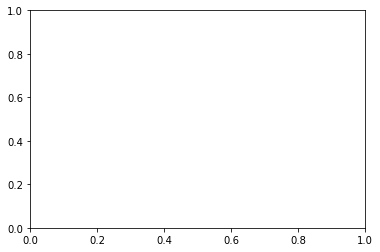

In [23]:
plt.plot(Xtest, y_model, color="blue", linewidth=3)


In [25]:
plt.show(y_model)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [168]:
# The coefficients
print('Coefficients: \n', model.coef_)

print('Mean home price: %.2f'
 %df ['sale_price'].mean())

# The mean squared error 
print ('Mean squared error: %.2f'
%mean_squared_error(ytest, y_model))

print ('Coefficent of determination : %.2f'
       %r2_score(ytest, y_model))

print('Linear MAE : %.2f'
      %mean_absolute_error(ytest, y_model))

Coefficients: 
 [-19290.07708775  25664.50272407    155.16306165 -36995.60483526]
Mean home price: 337271.09
Mean squared error: 3862754658.42
Coefficent of determination : 0.80
Linear MAE : 42516.65


In [ ]:
# PIPELINE process

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



categorical_features = X.select_dtypes([object]).columns

categorical_transformer = Pipeline(steps= [('imputer', SimpleImputer(strategy='constant',
                                            fill_value ='missing')), 
                                           ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

print (categorical_features)


Index([], dtype='object')


In [ ]:
# Identifying numeric columns

numeric_features = X.select_dtypes([np.number]).columns
numeric_transformer = Pipeline(steps = [("'Imputer", SimpleImputer(strategy = 'median')),
                                        ('scaler', StandardScaler())] )
                               
print(numeric_features)

In [101]:
#Loads two features/columns into one object

preprocessor = ColumnTransformer(transformers=[  ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features)])


In [74]:
#RANDOM FOREST


In [129]:
#Using pipeline to create a random forest model
#Data is split to have 25% in validation 

from sklearn.ensemble import RandomForestRegressor

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestRegressor(1000, max_depth=10))])
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, random_state = 1234, test_size = 0.25)

y_base = np.full(shape = len(y_model_rf),
                fill_value = df['sale_price'].mean(),
                dtype = int)


In [130]:
rf_clf.fit(X_train_rf, y_train_rf)

y_model_rf = rf_clf.predict(X_test_rf)

In [131]:
# R-square, MSE, RMSE are calculated

print('Coefficient of determination: %.2f'
%r2_score(y_test_rf, y_model_rf))

print('Mean squared error: %.2f'
%mean_squared_error(y_test_rf, y_model_rf))

print('Root mean squared error: %.2f'
%np.sqrt(mean_squared_error(y_test_rf, y_model_rf)))

print('Mean absolute error: %.2f'
%mean_absolute_error(y_test_rf, y_model_rf))

Coefficient of determination: 0.83
Mean squared error: 3140624706.74
Root mean squared error: 56041.28
Mean absolute error: 35482.74


In [169]:
print('The average home price 1s: %.2f'
%df['sale_price'].mean())

print('The average model MAE: %.2f'
%mean_absolute_error(y_test, y_base))

print ('Mean squared error: %.2f'
%mean_squared_error(y_test_rf, y_model_rf))

print('Linear MAE : %.2f'
      %mean_absolute_error(ytest, y_model))

print('Random Forest Model MAE: %.2f'
%mean_absolute_error(y_test_rf, y_model_rf))


The average home price 1s: 337271.09
The average model MAE: 102534.67
Mean squared error: 3140624706.74
Linear MAE : 42516.65
Random Forest Model MAE: 35482.74


In [ ]:
#SOLUTION:

We can choose the Random Forest model based on better R-square and less Mean absolute error compared the Linear regression model.


In [ ]:
# Challenges:

1.Identifying the right features for our saleprice prediction
2. Creating a pipeline for categorical and numeric features helped the data to be more clean and streamlined using imputer, scaler and encoding.
3. Selecting the best model only based on accuracy can be confusing. We should also consider factors to be implemented in the practical world.
4. Few column names were hard to understand.
5. Exploratory data analysis gives a basic understanding of the features and the target variable.